In [1]:
#import packages
#pip install textblob
#pip install keras
#pip install tensorflow
from textblob import TextBlob
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

2023-04-24 11:21:05.836251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [354]:
year = "2022"
file_path = "/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/"
file_path_2 = "_final_rnn.pickle"

df = pd.read_pickle(file_path + year + file_path_2)

In [355]:
def absolute_count(male_col, female_col):
    if female_col > male_col and male_col == 0:
        return 1
    elif male_col> female_col and female_col ==0: 
        return 0
    else: 
        return None

#PP Data
df['col_type'] = df.apply(lambda row: absolute_count(row['male_count'], row['female_count']),axis=1)
df = df[df["col_type"].notnull()]

In [356]:
def subjectivity(sentence):
    subjectivity = ""

    subjectivity = TextBlob(sentence).sentiment.subjectivity

    return subjectivity

def polarity(sentence):
    polarity = ""
    polarity = TextBlob(sentence).sentiment.polarity
    return polarity

In [357]:
df['subjectivity'] = df['string_rnn'].apply(subjectivity)
df['polarity'] = df['string_rnn'].apply(polarity)

In [358]:
#apply function to only get rows with an absolute count 
df['col_type'] = df.apply(lambda row: absolute_count(row['male_count'], row['female_count']),axis=1)
df = df[df["col_type"].notnull()]


In [359]:
val_count_m = df["col_type"].value_counts()[0]
val_count_f = df["col_type"].value_counts()[1]

In [360]:
def scores(df):
    sub_m = []
    pol_m = []
    sub_f = []
    pol_f = []
    for index, row in df.iterrows():
        if row["col_type"] == 0:
            sub_m.append(row["subjectivity"])
            pol_m.append(row["polarity"])
        elif row["col_type"] == 1: 
            sub_f.append(row["subjectivity"])
            pol_f.append(row["polarity"])
    
    return round((sum(sub_m))/val_count_m, 3), round((sum(pol_m))/val_count_m, 3), round((sum(sub_f))/val_count_f, 3), round((sum(pol_f))/val_count_f, 3)

**Results** 

*Subjectivity* - how subjective or objective a piece of text is. 0.0 is most objective and 1.0 is more subjective. 0.5 is a neutral score. 

*Polarity* - how positive or negative a piece of text is. -1 is most negative and 1 most positive. 


In [361]:
scores(df)

(0.293, 0.046, 0.31, 0.062)

In [362]:
#polarity and sentiment scores for F and M by year
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
sub_male = [0.286, 0.283, 0.286, 0.285, 0.286, 0.286, 0.292, 0.287, 0.286, 0.286, 0.298, 0.3, 0.293]
pol_male = [0.044, 0.046, 0.049, 0.046, 0.049, 0.047, 0.05, 0.045, 0.043, 0.04, 0.048, 0.05, 0.046]
sub_female = [0.29, 0.289, 0.292, 0.291, 0.292, 0.295, 0.299, 0.298, 0.302, 0.299, 0.313, 0.316, 0.31]
pol_female = [0.053, 0.055, 0.059, 0.055, 0.053, 0.057, 0.06, 0.057, 0.056, 0.053, 0.058, 0.058, 0.062]

sent_data = {'Year': years, 
             'Subjectivity (M)': sub_male,
             'Polarity (M)': pol_male, 
             'Subjectivity (F)': sub_female, 
             'Polarity (F)': pol_female}

sent_data = pd.DataFrame(sent_data)
sent_data

,Year,Subjectivity (M),Polarity (M),Subjectivity (F),Polarity (F)
0,2010,0.286,0.044,0.290,0.053
1,2011,0.283,0.046,0.289,0.055
2,2012,0.286,0.049,0.292,0.059
3,2013,0.285,0.046,0.291,0.055
4,2014,0.286,0.049,0.292,0.053
5,2015,0.286,0.047,0.295,0.057
6,2016,0.292,0.050,0.299,0.060
7,2017,0.287,0.045,0.298,0.057
8,2018,0.286,0.043,0.302,0.056
9,2019,0.286,0.040,0.299,0.053


**EDA Yearly Sentiment**

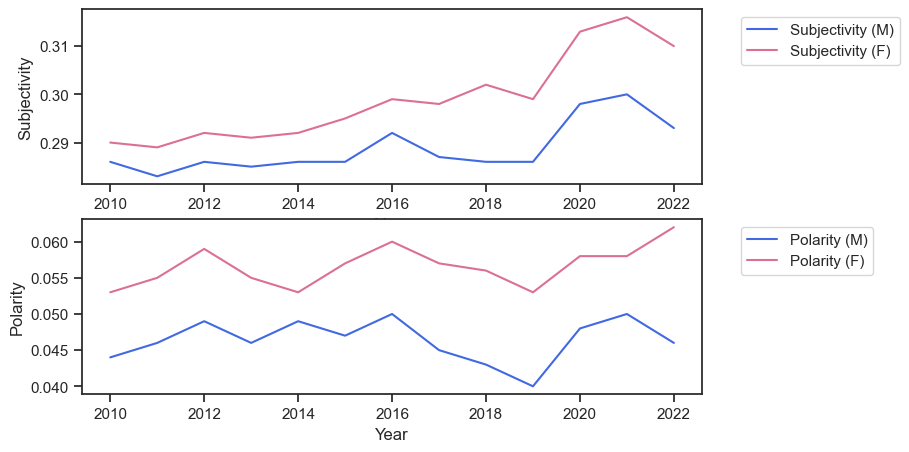

In [375]:
sub = sent_data[['Year', 'Subjectivity (M)', 'Subjectivity (F)']]
pola = sent_data[['Year','Polarity (M)', 'Polarity (F)']]

sns.set_theme(style='ticks')
fig, axis = plt.subplots(nrows =2, figsize = (8,5))
ax = sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(sub, ['Year']),
             palette=['royalblue', 'palevioletred'],  
             ax = axis[0])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(xlabel = "Year", ylabel = "Subjectivity")

ax = sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(pola, ['Year']),
             palette=['royalblue', 'palevioletred'], ax = axis[1])

ax.set(xlabel = "Year", ylabel = "Polarity")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Decade Model**

In [ ]:
file_path = "/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/"
file_path_2 = "_final_rnn.pickle"

df_10= pd.read_pickle(file_path + "2010" + file_path_2)
df_11= pd.read_pickle(file_path + "2011" + file_path_2)
df_12= pd.read_pickle(file_path + "2012" + file_path_2)
df_13= pd.read_pickle(file_path + "2013" + file_path_2)
df_14= pd.read_pickle(file_path + "2014" + file_path_2)
df_15= pd.read_pickle(file_path + "2015" + file_path_2)
df_16= pd.read_pickle(file_path + "2016" + file_path_2)
df_17= pd.read_pickle(file_path + "2017" + file_path_2)
df_18= pd.read_pickle(file_path + "2018" + file_path_2)
df_19= pd.read_pickle(file_path + "2019" + file_path_2)
df_20= pd.read_pickle(file_path + "2020" + file_path_2)
df_21= pd.read_pickle(file_path + "2021" + file_path_2)
df_22= pd.read_pickle(file_path + "2022" + file_path_2)